<a href="https://colab.research.google.com/github/aryanmikaeili/cmpt732_tutorials/blob/master/numpy_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMPT 732 - Fall 2021
# Numpy introduction

__content creator:__ Aryan Mikaeili

# Introduction

Numpy is a module in python for numeric computations. It allows fast calculations on vectors, matrices, and high-dimensional arrays in general. Some features:

1. Provides built-in functions for calculations in linear algebra and calculus. e.g. finding eigen-values and eigen-vectors of matrices, matrix multiplications, etc.

2. Much faster than python, because critical parts are written in C/C++.

3. Many functions are similar to Matlab.
4. Only supports CPUs (no GPU support).

# Installing and importing numpy

To use numpy in our you should first install the module and then import it in our code. If you don't already have numpy, you can install it with __pip__ (type __pip install numpy__ in terminal).

In [4]:
#importing numpy

import numpy as np

# Comparing python with and without numpy

In the code below you can see that element-wise addition of two vectors, takes much less time with numpy.

In [5]:
#@title run this cell to import needed modules and define the array generator function.
import time
import random
 

#this function generates two random arrays with length 'size'
def generate_random_arrays(size = 100):
  a = [random.random() for _ in range(size)]
  b = [random.random() for _ in range(size)]
  return a, b

In [6]:
size = 1000000
# generate random vector a and b
a, b = generate_random_arrays(size=size)

###################################################
# adding without using numpy
t = time.time_ns() #current time
result = [] #the array that will contain the result

#computing the element-wise additionaaa
for i in range(size): 
  result.append(a[i] + b[i])

running_time_n = time.time_ns() - t

print('without using numpy the run time is:',running_time_n // 1000, 'micro seconds')

####################################################
#adding with numpy
t = time.time_ns()
result = np.add(a, b)
running_time_y = time.time_ns() - t
print('with using numpy the run time is:',running_time_y // 1000, 'micro seconds')
####################################################

print('ratio:', round(running_time_n / running_time_y, 2))


without using numpy the run time is: 588130 micro seconds
with using numpy the run time is: 248541 micro seconds
ratio: 2.37


# Creating arrays

arrays in python could be vectors (1D), matrices (2D), or tensors (higher order). 

In [7]:
#@title array of pre-defined values

a1 = np.array([1, 2, 3])
m1 = np.array([[1, 2, 3],[3,4, 5]], dtype = np.float64)

print('a1: ', a1, 'type:', a1.dtype)
print('m1: ', m1, 'type:', m1.dtype)

a1:  [1 2 3] type: int64
m1:  [[1. 2. 3.]
 [3. 4. 5.]] type: float64


In [8]:
#@title array of all ones/zeros

a_zeros = np.zeros((3, 2))
a_ones = np.ones((3, 2))

print('a_zeros: ', a_zeros)
print('a_ones:', a_ones)

a = np.array([[1,2],[3,4],[5,6]])
mat = np.zeros_like(a)
print(mat, mat.shape)

a_zeros:  [[0. 0.]
 [0. 0.]
 [0. 0.]]
a_ones: [[1. 1.]
 [1. 1.]
 [1. 1.]]
[[0 0]
 [0 0]
 [0 0]] (3, 2)


In [9]:
#@title arrays using range

#an array from 1 to 40 (not including 40) with step size 2
a = np.arange(1, 40, 1, dtype = np.float32)
print('a:', a)

a: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39.]


In [10]:
#@title array copy-view

a1 = np.array([[1, 2, 3],[2, 3, 4]])
a2 = np.array([[1, 2, 3],[2, 3, 4]])

b = a1.copy()
c = a2.view()

print('b:', b)
print('c:', c)
print('------------------------')
########################################
b[1, 2] = 15
c[1, 2] = 15
########################################
print('a1:', a1)
print('a2:', a2)

# print the dimension of matrix
print(a1.shape)


b: [[1 2 3]
 [2 3 4]]
c: [[1 2 3]
 [2 3 4]]
------------------------
a1: [[1 2 3]
 [2 3 4]]
a2: [[ 1  2  3]
 [ 2  3 15]]
(2, 3)


# Shapes, transpose, and reshaping

In [11]:
#@title shapes
a = np.array([[1, 2, 3],[2, 3, 4],[3, 4, 5],[4, 5, 6]])
print('shape of a:', a.shape)

shape of a: (4, 3)


In [12]:
#@title transposing matrices and high-dimensional arrays

a = np.array([[1, 2, 3],[2, 3, 4],[3, 4, 5],[4, 5, 6]])
# transpose the matrix
print('transpose of a:',a.T)
#can also use the function np.transpose
print('transpose of a (second method):', a.transpose(1, 0))

# not trans
mat = np.array([[1,2,3,4],[2,3,4,5],[3,4,5,6]])
print(mat.reshape(4,3))

transpose of a: [[1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]]
transpose of a (second method): [[1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]]
[[1 2 3]
 [4 2 3]
 [4 5 3]
 [4 5 6]]


In [13]:
class Human:
    def __init__(self, name, age):
        self.name = name
        self.age = age

h = Human('A', 23)

In [14]:
#@title reshaping

a = np.array([[1, 2, 3],[2, 3, 4],[3, 4, 5],[4, 5, 6]])
a_reshaped_1 = a.reshape((3, 4))
a_reshaped_2 = a.reshape((-1, 4))

print(a_reshaped_1)
print(a_reshaped_2)

[[1 2 3 2]
 [3 4 3 4]
 [5 4 5 6]]
[[1 2 3 2]
 [3 4 3 4]
 [5 4 5 6]]


#indexing arrays

In [15]:
a = np.array([[1, 2, 3],[2, 3, 4],[3, 4, 5],[4, 5, 6]])

print(a[1])
print('-----------------------')
print(a[1, 2])
print('-----------------------')
print(a[1:3, 2])
print('-----------------------')
print(a[:,::-1])
print('-----------------------')
print(a[[1, 3], 2])
print('-----------------------')
print(a < 3)
print('-----------------------')
a[a < 3] = 10
print(a)



[2 3 4]
-----------------------
4
-----------------------
[4 5]
-----------------------
[[3 2 1]
 [4 3 2]
 [5 4 3]
 [6 5 4]]
-----------------------
[4 6]
-----------------------
[[ True  True False]
 [ True False False]
 [False False False]
 [False False False]]
-----------------------
[[10 10  3]
 [10  3  4]
 [ 3  4  5]
 [ 4  5  6]]


#logical and arithmetic operations

In [16]:
#@title concatenating two arrays

a = np.ones((5, 2))
b = np.zeros((3, 2))

print(np.concatenate([a, b]))
print('-----------------------')

#specifying the axis

a = np.ones((5, 2))
b = np.zeros((5, 1))

print(np.concatenate([a, b], axis = 1))

[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
-----------------------
[[1. 1. 0.]
 [1. 1. 0.]
 [1. 1. 0.]
 [1. 1. 0.]
 [1. 1. 0.]]


In [17]:
#@element-wise operations

a = np.array([1, 2, 3])
b = np.array([2, 3, 4])

#addition

print('a + b =', a + b)

#element-wise multiplication
print('ab = ', a * b)

print(np.inner(a, b))
np.outer(a, b)

a + b = [3 5 7]
ab =  [ 2  6 12]
20


array([[ 2,  3,  4],
       [ 4,  6,  8],
       [ 6,  9, 12]])

In [18]:
#@title broadcasting

a = np.array([[1, 2, 3],[2, 3, 4],[3, 4, 5]])
# repeat itself three times
b = np.array([1, 2, 3])
print(a + b)
print('-----------------------')
# repeat for one numbers
print(a + 3)

[[2 4 6]
 [3 5 7]
 [4 6 8]]
-----------------------
[[4 5 6]
 [5 6 7]
 [6 7 8]]


In [19]:
a = np.random.randn(3, 2, 2)
b = np.random.randn(2, 2)
a + b

array([[[-0.70055318,  0.28825495],
        [ 0.02810704,  2.01515718]],

       [[-0.50010935,  0.75041722],
        [ 1.58220672,  2.17758809]],

       [[ 0.58987798,  1.95215972],
        [-0.74212849,  1.54952963]]])

In [20]:
#@title built-in mathematical operations

a= np.array([1, 4, 16])
print('sqrt of a:', np.sqrt(a))
print('-----------------------')
a = np.array([0, np.pi / 2, np.pi])
print('sin of a:', np.sin(a))
print('-----------------------')
a = np.array([-2, -1, 0, 1, 2])
print('abolute value of a:', np.abs(a))

sqrt of a: [1. 2. 4.]
-----------------------
sin of a: [0.0000000e+00 1.0000000e+00 1.2246468e-16]
-----------------------
abolute value of a: [2 1 0 1 2]


In [21]:
#@title unary mathematical functions

a = np.arange(0, 10)
print('a:', a)
print('-----------------------')
print('sum of a:', a.sum())
print('-----------------------')
print('average of a:', a.mean())
print('-----------------------')

m = a.reshape(5, 2)
print('m:', m)
print('-----------------------')
print('average of columns of m:',m.mean(axis = 0))
print('-----------------------')
print('average of rows of m:',m.mean(axis = 1))


a: [0 1 2 3 4 5 6 7 8 9]
-----------------------
sum of a: 45
-----------------------
average of a: 4.5
-----------------------
m: [[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
-----------------------
average of columns of m: [4. 5.]
-----------------------
average of rows of m: [0.5 2.5 4.5 6.5 8.5]


In [22]:
#@title matrix multiplication

m1 = np.array([[1 ,2 ,3],[2, 3, 4]])
m2 = np.array([[1, 2],[2, 3],[3, 4]])

print('m1.m2 = ', np.matmul(m1, m2))
print('m1.m2 = ', m1@ m2)
print('m1.m2 = ', np.dot(m1,m2))

m1.m2 =  [[14 20]
 [20 29]]
m1.m2 =  [[14 20]
 [20 29]]
m1.m2 =  [[14 20]
 [20 29]]


In [23]:
#@title some linear algebra operations

m = np.diag([1, 2, 3])
print('determinant of m:', np.linalg.det(m))
print('---------------------------------')
print('eigen-values of m:',np.linalg.eig(m)[0])

determinant of m: 6.0
---------------------------------
eigen-values of m: [1. 2. 3.]


In [24]:
#@title some useful functions

#all, any
a = np.array([1, 2, 3])
b = np.array([1, 2, 3])
c = np.array([1, 4, 6])
d = np.array([5, 6, 7])
print('all:', np.all(a == b))
print('all:', np.all(a == c))
print('----------------------------')
print('any:', np.any(a == c))
print('any:', np.any(a == d))
print('----------------------------')
#where
a = np.random.randint(0, 10, 20)
b = np.random.randint(0, 10, 20)
print('a:', a)
print('b:', b)
print('where:', np.where(a == b))
print('----------------------------')
#unique

a =  np.random.randint(0, 10, 20)
print('unique:', np.unique(a, return_counts=True))


all: True
all: False
----------------------------
any: True
any: False
----------------------------
a: [7 0 3 6 2 8 5 1 4 0 8 2 0 2 5 3 0 8 2 8]
b: [5 7 5 1 8 7 5 3 5 2 6 8 9 6 5 5 7 4 5 8]
where: (array([ 6, 14, 19]),)
----------------------------
unique: (array([0, 1, 2, 3, 4, 5, 7, 8, 9]), array([2, 3, 2, 3, 3, 1, 2, 1, 3]))


#Project

Today we want to implement the Kmeans algorithm using Numpy. 

Kmeans is a method for clustering data. clustering generally means that given of set of datapoints from different classes, we want to seperate or classify the data without having any prior labels from the data. for example we can be given a dataset like the one below.

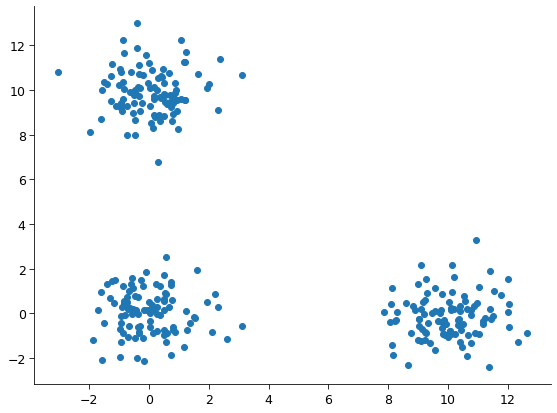

In [25]:
#@title run this cell to generate data in 3 classes and import needed functions

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

data = make_blobs(n_samples = [100, 100, 100], centers=[[0, 0], [0, 10], [10, 0]])[0]

plt.scatter(data[:, 0], data[:, 1])
plt.show()

and without any extra knowledge from the datapoints and their classes, we want to cluster them; i.e. get something like the figure above

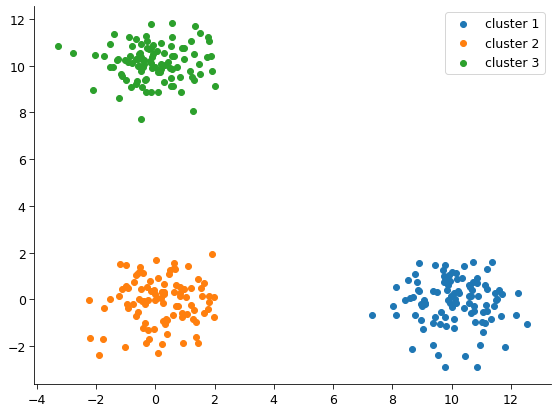

In [39]:
#@title click to view clustering result

import random

def find_distance(x, y):

  """ please do not edit this function """

  ##################################Inputs##################################
  # x : (N1 * f) ndarray
  # y : (N2 * f) ndarray
  ##########################################################################

  ##################################Outputs##################################
  #o:  (N1 * N2) ndarray , o[i, j] is the distance of x[i] and y[j] squared
  ##########################################################################

  k = y.shape[0]
  data_size = x.shape[0]

  x_norm = np.repeat(np.expand_dims(np.linalg.norm(x, axis = 1) ** 2, 1), k, axis = 1)
  y_norm = np.repeat(np.expand_dims(np.linalg.norm(y, axis = 1) ** 2, 0), data_size, axis = 0)
  x_y_inner = np.matmul(x, y.T)

  o = x_norm + y_norm - 2 * x_y_inner
  return o

class Kmeans:

  def __init__(self, x, k, max_iters = 1000):
    self.x = x
    self.data_size = x.shape[0]
    self.feature_size = x.shape[1]
    self.k = k
    self.max_iters = max_iters

    self.centers = np.zeros((k, x.shape[1]))
  
    self.predictions = np.zeros(self.data_size)



  def Kmeans_plus_plus(self):
    centers = np.zeros((self.k, self.feature_size))
  
    centers[0] = random.choices(self.x)[0]

    for i in range(1, self.k):
      current_centers = centers[: i]
      data_center_dists = find_distance(self.x, current_centers)

      min_dists = data_center_dists.min(axis = 1)
      centers[i] = random.choices(self.x, weights = min_dists)[0]
    return centers

  def random_init(self):
      mean = np.mean(self.x, axis = 0)
      std = np.std(self.x, axis = 0)

      centers = np.random.randn(self.k, self.feature_size) * mean + std

      return centers


  def predict(self, init_mode = 'random'):

    if init_mode == 'random':
      self.centers = self.random_init()
    elif init_mode == 'kmeans++':
      self.centers = self.Kmeans_plus_plus()
    for i in range(self.max_iters):
      data_center_dists = find_distance(self.x, self.centers)
      self.predictions = data_center_dists.argmin(axis = 1)

      prev_centers = np.copy(self.centers)

      for j in range(self.k):
        cluster_j = self.x[self.predictions == j] 
        if len(cluster_j) > 0:
          self.centers[j] = cluster_j.mean(axis = 0)
      
      if (prev_centers == self.centers).all():
        return

model = Kmeans(data, 3)
model.predict('kmeans++')

plt.scatter(data[model.predictions == 0, 0], data[model.predictions == 0, 1])
plt.scatter(data[model.predictions == 1, 0], data[model.predictions == 1, 1])
plt.scatter(data[model.predictions == 2, 0], data[model.predictions == 2, 1])

plt.legend(['cluster 1', 'cluster 2', 'cluster 3'])
plt.show()

Kmeans tries to minimize the following function:


$$ J = \sum_{j=1}^k\sum_{x \in S_j} ||x - \mu_j||^2$$

which basically means that we want to find cluster centeroids ($\mu$s) and assign datapoints to clusters in a way that the sum of distances between each datapoint and it's cluster's centeroid is minimized.

However it turns out that this equation is really hard to optimize as it is. As a result we settle for an iterative algorithm with the following steps:

1. initialize centeroids
2. assign each datapoint to the cluster of it's nearest centeroid
3. after assigning the datapoints, compute centeroids of each cluster
4. go back to step 2 until convergance or a fixed number of iterations have passed.


# Part 1: generate data

Earlier we talked about how there are different ways to create numpy arrays. one method that we didn't talk about was random arrays. numpy has a whole set of functions in __np.random__ for generating different kinds of random arrays. In this part you have to generate three clusters of data using the multivariate gaussian distribution. more precisely, for each cluster randomly sample 100 datapoints with means $\mu = \{[0, 0], [0, 10], [10, 0]\}$ and covariance matrix of identity. then concatenate datapoints of each cluster and shuffle the datapoints. you should save the data in a variable called data.


In [27]:
#Generate the three clusters
...
#concatenate the generated data to get one data array
...
#shuffle the data array
...

In [ ]:
#@title Solution

#generating clusters
cluster1 = np.random.multivariate_normal(mean=[0, 0], cov=np.diag([1, 1]), size= 100)
cluster2 = np.random.multivariate_normal(mean=[10, 0], cov=np.diag([1, 1]), size= 100)
cluster3 = np.random.multivariate_normal(mean=[0, 10], cov=np.diag([1, 1]), size= 100)
# print(cluster1)

#concatenating the clusters
data = np.concatenate([cluster1, cluster2, cluster3])

#shuffling the data
np.random.shuffle(data)
print(data)


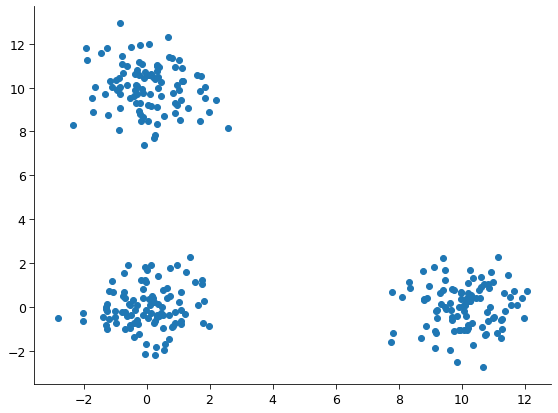

In [46]:
#@title Run this cell to see the result of your code
plt.scatter(data[:, 0], data[:, 1])
plt.show()

#Part 2: Auxiliary distance function

In this part we want to write a function that takes two arrays of data D1, D2 with shapes $N1 \times D$ and $N2 \times D$, in which $N_i$ is the number of data points and D is the dimension of the data, and gives back a matrix M with shape $N_1 \times N_2$, in which element $n_{ij}$ of that matrix is the square $L2$ distance of point $i$ from D1 and point $j$ from D2. The trick here is to not use any loops. you can do that by using the fact that:

$|x - y|^2 = x^Tx - 2x^Ty + y^Ty$.

__hint__: use np.repeat() to repeat row/columns in an array.

![title](img01.jpg)

In [ ]:
#@title Solution
def find_distance(X, Y):
  #the number and dimension of the data
  N1 = X.shape[0]
  N2 = Y.shape[0]
  D = X.shape[1]
  # compute the distance matrix
  XX = np.repeat(np.sum(X**2, axis=1), N2, axis=1)
  XY = X@Y.T
  YY = np.repeat(np.sum(Y**2, axis=1), N1, axis=1).T
  return XX + YY - 2*XY

In [50]:
#@title Solution
def find_distance(X, Y):
  #the number and dimension of the data
  N1 = X.shape[0]
  N2 = Y.shape[0]
  D = X.shape[1]

  # keepdims: we want vector of size n by 1
  x2 = np.repeat(np.sum(X ** 2, axis = 1, keepdims=True), N2, axis = 1)
  xy = np.matmul(X, Y.T)
  # xy = X @ Y.T
  y2 = np.repeat(np.sum(Y ** 2, axis = 1, keepdims=True), N1, axis = 1).T
  return x2 - 2 * xy + y2



In [49]:
#you can check your code by cheking the diagonal elements of the distance matrix of two identical data. 
    print(find_distance(data, data))

[[ 0.00000000e+00  1.41932502e+02  1.06552949e+02 ...  6.61792803e+00
   6.73749836e+01  3.80030400e+01]
 [ 1.41932502e+02  0.00000000e+00  2.61518891e+00 ...  1.84398782e+02
   8.34027386e+01  6.58432433e+01]
 [ 1.06552949e+02  2.61518891e+00  0.00000000e+00 ...  1.45344185e+02
   6.14943844e+01  4.36448563e+01]
 ...
 [ 6.61792803e+00  1.84398782e+02  1.45344185e+02 ... -2.84217094e-14
   1.16106966e+02  7.52331070e+01]
 [ 6.73749836e+01  8.34027386e+01  6.14943844e+01 ...  1.16106966e+02
   0.00000000e+00  5.99884109e+00]
 [ 3.80030400e+01  6.58432433e+01  4.36448563e+01 ...  7.52331070e+01
   5.99884109e+00  0.00000000e+00]]


#Part3: defining the Kmeans class

now that we have all we need we can implement the kmeans algorithm. In this part you have to define the Kmeans class and write its constructor. the Kmeans class should take the data, number of clusters, and the maximum number of iterations we want the algorithm to run before termination upon instantiation.

In [33]:
class Kmeans:
  def __init__(self, data, k, max_iter = 1000):
    self.data = ...
    self.k = ...
    #number of data points
    self.data_size = ...
    #the data dimension
    self.dim = ...

    self.max_iter = ...

    #define a predictions array here. at first it should be all zeros, but when the algorithm is executed the array will be filled with the clustering predictions.

    self.predictions = ...


In [34]:
#@title Solution
class Kmeans:
  def __init__(self, data, k, max_iter = 1000):
    self.data = data
    self.k = k
    #number of data points
    self.data_size = data.shape[0]
    #the data dimension
    self.dim = data.shape[1]

    self.max_iter = max_iter

    self.predictions = np.zeros(self.data_size)
    


In [35]:
#run this part to check your code

kmeans_predictor = Kmeans(data, 3, max_iter=1000)
print(kmeans_predictor.data_size, kmeans_predictor.dim, kmeans_predictor.k)

300 2 3


#Part 4 implement the Kmeans algorithm

Now that we have the class we can implement the clustering algorithm itself. you should complete the predict function of the Kmeans class. remember that this function does not return anything. it fills the predictions array. note that there are many ways for initializing the centeroids at the beginning of the algorithm, and it does affect the result of the algorithm. but here for the sake of simplicity just use three random points from the data.

In [36]:
class Kmeans:
  def __init__(self, data, k, max_iter = 1000):
    self.data = data
    self.k = k
    #number of data points
    self.data_size = data.shape[0]
    #the data dimension
    self.dim = data.shape[1]

    self.max_iter = max_iter
    
    self.predictions = np.zeros(self.data_size)

  def predict(self):
    #initialize centeroids with k random datapoints
    centeroids = ...

    #iterate for max_iter times and perform the algorithm
    for i in range(max_iter):
      ...
    

In [37]:
#@title Solution
class Kmeans:
  def __init__(self, data, k, max_iter = 1000):
    self.data = data
    self.k = k
    #number of data points
    self.data_size = data.shape[0]
    #the data dimension
    self.dim = data.shape[1]

    self.max_iter = max_iter
    
    self.predictions = np.zeros(self.data_size)

  def predict(self):
    #initialize centeroids with k random datapoints
    centeroids = self.data[np.random.randint(0, self.data_size, size = self.k)]
    for i in range(self.max_iter):
      print(i)

      distances = find_distance(self.data, centeroids)
      # in axis=1, find the min
      predictions = np.argmin(distances, axis = 1)

      for j in range(self.k):
        current_cluster = self.data[predictions == j]
        if len(current_cluster) > 0:
          centeroids[j] = np.mean(self.data[predictions == j], axis = 0)


    self.predictions = predictions
          

      


In [51]:
a = np.array([3,1,2,5,0,6,6])
np.argmin(a)

4

In [ ]:
#run this cell to check your code. It is possible that your algorithm gets stuck in a local minima. so if the result is wrong, run multiple times to make sure.
model = Kmeans(data, 3)
model.predict()

plt.scatter(data[model.predictions == 0, 0], data[model.predictions == 0, 1])
plt.scatter(data[model.predictions == 1, 0], data[model.predictions == 1, 1])
plt.scatter(data[model.predictions == 2, 0], data[model.predictions == 2, 1])

plt.legend(['cluster 1', 'cluster 2', 'cluster 3'])
plt.show()

In [53]:
# saving and loading numpy arrays
a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

np.save('sample', a)

# load
b = np.load('sample.npy')
print("b:", b)

b: [ 1  2  3  4  5  6  7  8  9 10]
